In [1]:
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
stk_data=pd.read_csv("AxisBank_Stock.csv")

In [3]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
0,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
1,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
3,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
4,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
139,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
140,722.000000,725.250000,708.049988,712.500000,710.691895,10689060
141,715.000000,716.400024,688.200012,704.599976,702.811890,8812501
142,714.000000,755.000000,708.599976,752.200012,750.291138,38088158


In [4]:
stkdata=stk_data[["Open","High","Low","Close"]]


In [5]:
stkdata

,Open,High,Low,Close
0,750.000000,754.400024,744.500000,746.450012
1,747.599976,752.849976,744.000000,750.650024
2,757.099976,762.000000,753.400024,760.349976
3,757.000000,767.000000,755.200012,758.349976
4,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
139,731.049988,737.150024,722.150024,728.900024
140,722.000000,725.250000,708.049988,712.500000
141,715.000000,716.400024,688.200012,704.599976
142,714.000000,755.000000,708.599976,752.200012


In [6]:
column="Close"
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print("Length : ",data1.shape)

Length :  (144, 1)


In [7]:
training_size=round(len(data1)*0.80)
print("Training Size : ",training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length : ", x_train.shape)
print("x_test length : " , x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length : ", y_train.shape)
print("y_test length : " , y_test.shape)

Training Size :  115
x_train length :  (115, 1)
x_test length :  (29, 1)
y_train length :  (115, 1)
y_test length :  (29, 1)


In [8]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model Creation
model = SimpleExpSmoothing(x_train)
model_fit = model.fit(smoothing_level=0.6)  

# Making prediction
y_pred=model_fit.predict(len(x_train),len(data1)-1)



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


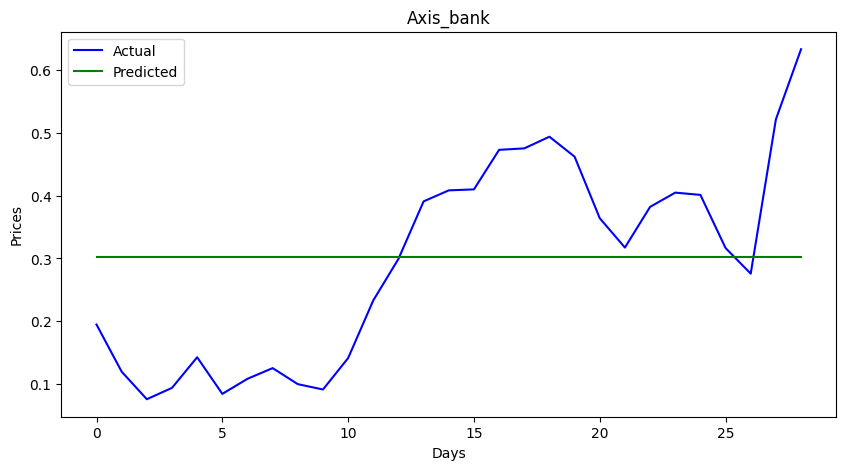

In [9]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Axis_bank","Days","Prices")

In [10]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [11]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

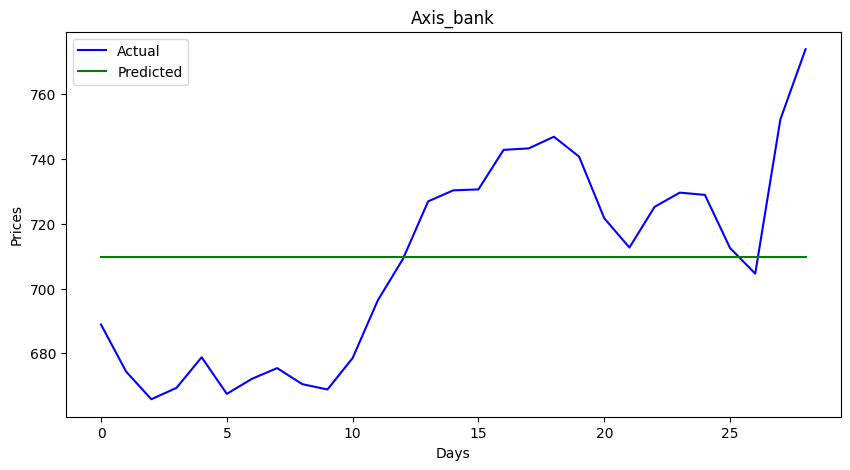

In [12]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Axis_bank","Days","Prices")

In [13]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 30.928629467202963
maPe-Testset: 0.03853649716285913


In [14]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.30220575, 0.30220575, 0.30220575, 0.30220575])

In [15]:
forecastfore=model_fit.forecast(steps=3)
forecastfore

array([0.30220575, 0.30220575, 0.30220575])

In [16]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["CloseFore"])
forecast_stock_price_test_ori=ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_orif=conversionSingle(forecast_stock_price_test_ori,["CloseFore"])

In [17]:
forecast_stock_price_test_orif

,CloseFore
0,709.72789
1,709.72789
2,709.72789
3,709.72789


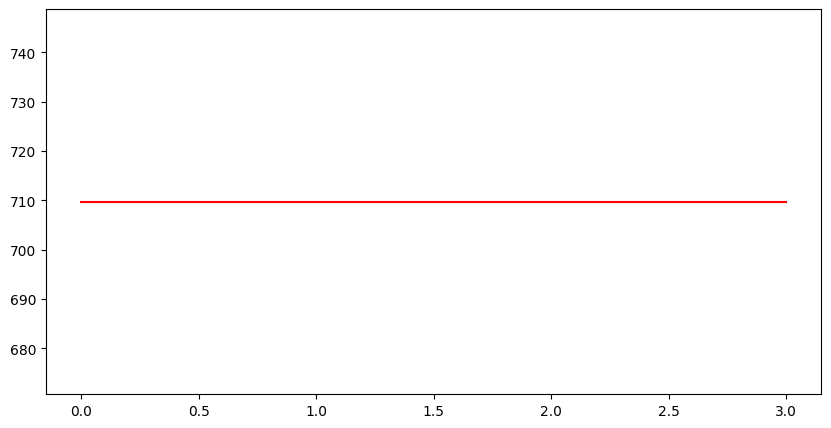

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_orif, color = 'red', label ="Predicted")